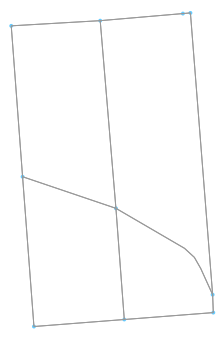

(<Figure size 352.069x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d3f32ecc0>)

In [322]:
import numpy as np
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon, LineString

# BUILD GRAPH

# set bbox bounds: # (will eventually come from drawing)

north = 37.7599 # max lat 
south = 37.7569 # min lat
east = -122.3997 # max lng
west = -122.4023 # min lng 
 
# create graph
G = ox.graph_from_bbox(north, south, east, west, network_type='walk')

# display graph
ox.plot_graph(G)


In [323]:
# Get graph info 

basic_stats = ox.basic_stats(G)
    
print("\n n (number of nodes in the graph):", basic_stats['n'])
print("\n m (number of edges in the graph):", basic_stats['m']/2) # because it's an undirected graph
print("\n street_length_total (sum in meters):", basic_stats['street_length_total']/2)



 n (number of nodes in the graph): 10

 m (number of edges in the graph): 13.0

 street_length_total (sum in meters): 710.483


In [261]:
# GET graph data frames
nodes, edges = ox.graph_to_gdfs(G) # make two dataframes - one for nodes and one for edges

# Edges table
edges

# REF:
# geometry
# highway tag
# length (meters)
# name
# osmid - of the way that the edge is part of, not just of the section
# u - start node
# v - end node 

,geometry,highway,key,length,name,oneway,osmid,u,v
0,"LINESTRING (-122.4020923 37.7596792, -122.4019...",residential,0,143.868,Rhode Island Street,False,84805680,65294613,65294615
1,"LINESTRING (-122.4020923 37.7596792, -122.4011...",residential,0,84.738,20th Street,False,224384045,65294613,65320188
2,"LINESTRING (-122.4019697 37.758389, -122.40096...",residential,0,93.711,Southern Heights Avenue,False,8919494,65294615,65320191
3,"LINESTRING (-122.4019697 37.758389, -122.40184...",residential,0,142.851,Rhode Island Street,False,84805680,65294615,65294616
4,"LINESTRING (-122.4019697 37.758389, -122.40209...",residential,0,143.868,Rhode Island Street,False,84805680,65294615,65294613
5,"LINESTRING (-122.4018467 37.757108, -122.40086...",residential,0,86.158,22nd Street,False,28669973,65294616,65320193
6,"LINESTRING (-122.4018467 37.757108, -122.40196...",residential,0,142.851,Rhode Island Street,False,84805680,65294616,65294615
7,"LINESTRING (-122.40096 37.7581188, -122.401969...",residential,0,93.711,Southern Heights Avenue,False,8919494,65320191,65294615
8,"LINESTRING (-122.40096 37.7581188, -122.400869...",residential,0,106.023,De Haro Street,False,224384013,65320191,65320193
9,"LINESTRING (-122.40096 37.7581188, -122.40113 ...",residential,0,179.060,De Haro Street,False,224384013,65320191,65320188


In [257]:
nodes

,osmid,x,y,geometry
65294613,65294613,-122.402092,37.759679,POINT (-122.4020923 37.7596792)
65294615,65294615,-122.401970,37.758389,POINT (-122.4019697 37.758389)
65294616,65294616,-122.401847,37.757108,POINT (-122.4018467 37.757108)
65320191,65320191,-122.400960,37.758119,POINT (-122.40096 37.7581188)
65320193,65320193,-122.400870,37.757168,POINT (-122.4008696 37.757168)
65313453,65313453,-122.400154,37.759790,POINT (-122.4001542 37.7597898)
65313455,65313455,-122.399914,37.757380,POINT (-122.399914 37.7573804)
65313458,65313458,-122.399907,37.757227,POINT (-122.3999067 37.7572271)
3074358133,3074358133,-122.400235,37.759784,POINT (-122.4002355 37.7597842)
65320188,65320188,-122.401130,37.759723,POINT (-122.40113 37.7597235)


In [281]:
# FIND ODD NODES 

# figure out how many edges, (u,v) pairs, include each node   

# initialized dictionary to add nodes to
nodes_dict = {}

# add each node as key in dict 
for node in G.nodes:
    nodes_dict[node] = set() # using a set so the same edge, reordered, cannot be added -- avoid dupes
    
# confirm that the dict has the expected number of nodes 

expected_node_count = basic_stats['n']
actual_node_count = len(nodes_dict.keys())
print("Confirmed node count:", expected_node_count == actual_node_count)


expected_edge_count = basic_stats['m'] # from directed graph - needs to be divided by 2
edge_counter = 0

for edge in G.edges:
    
    # edge is a three item tuple: (start,end,weight) 
    
    start_node = edge[0]
    end_node = edge[1]
    
    # name edge by start and end node 
    edge = (start_node, end_node) 
    
    # add tuple of (start_node, end_node, edge osmid) to the node - this is the id b/c wayid is not 
    # unique to the edge
    edge_identifier = (start_node, end_node)
    nodes_dict[start_node].add(edge_identifier)
    # edge_counter += 1 # use later to confirm edge count 


print("\n\nNodes dictionary:\n")
print(nodes_dict)

Confirmed node count: True


Nodes dictionary:

{65294613: {(65294613, 65320188), (65294613, 65294615)}, 65294615: {(65294615, 65294613), (65294615, 65294616), (65294615, 65320191)}, 65294616: {(65294616, 65320193), (65294616, 65294615)}, 65320191: {(65320191, 65320188), (65320191, 65313455), (65320191, 65294615), (65320191, 65320193)}, 65320193: {(65320193, 65313458), (65320193, 65294616), (65320193, 65320191)}, 65313453: {(65313453, 65313455), (65313453, 3074358133)}, 65313455: {(65313455, 65313453), (65313455, 65320191), (65313455, 65313458)}, 65313458: {(65313458, 65313455), (65313458, 65320193)}, 3074358133: {(3074358133, 65320188), (3074358133, 65313453)}, 65320188: {(65320188, 65294613), (65320188, 65320191), (65320188, 3074358133)}}



node: 65294615
edge_count: 3

node: 65320193
edge_count: 3

node: 65313455
edge_count: 3

node: 65320188
edge_count: 3

Odd nodes:
[65294615, 65320193, 65313455, 65320188]





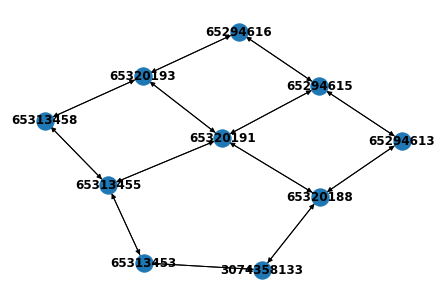

In [288]:
# GET ODD NODES 

# find nodes that have an odd count of assoicated edges

odd_nodes = []

for node in nodes_dict:
    edge_count = len(nodes_dict[node])
    if edge_count % 2 != 0:
        # compile list of odd nodes 
        print("\nnode:", node)
        # print("edges:", nodes_dict[node])
        print("edge_count:", edge_count)
        odd_nodes.append(node)

print("\nOdd nodes:")
print(odd_nodes)
print("\n\n")

# draw graph for visual check of odd nodes
nx.draw(G, with_labels=True, font_weight='bold')


In [342]:
# GET POSSIBLE COMBINATIONS OF ODD NODES

# notes:
## each option list should be len(odd_node)/2 long

# print(odd_nodes)

#-------EXAMPLE-MESS-AROUND----------# 

alpha_list = ['A','B','C','D']

# op_1 = [(A,B), (C,D)] 
# op_2 = [(A,C), (B,D)]
# op_3 = [(A,D), (B,C)]
# op_4 = [(B,C), (A,D)] # same as op3
# op_5 = [(B,D), (A,C)] # same as op2
# op_6 = [(C,D), (A,B)] # same as op1

# expected result: [
#                   [ (A,B), (C,D) ], 
#                   [ (A,C), (B,D) ], 
#                   [ (A,D), (B,C) ]
#                  ]

from itertools import combinations

alpha_list = ['A','B','C','D']

def get_list_of_unique_pairs(node_list):

    all_possible_combos_iter = combinations(node_list, 2) # makes an object 

    list_of_unique_pairs = []

    for i in all_possible_combos_iter:
        list_of_unique_pairs.append(i)
    return(list_of_unique_pairs)

get_list_of_unique_pairs(alpha_list)



[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

In [423]:
alpha_list = ['A','B','C','D']

# the following is from: https://stackoverflow.com/questions/5360220/how-to-split-a-list-into-pairs-in-all-possible-ways
# need to work more on this 

import itertools

def all_pairs(lst):
    if len(lst) < 2:
        yield []
        return
    if len(lst) % 2 == 1:
        # Handle odd length list
        for i in range(len(lst)):
            for result in all_pairs(lst[:i] + lst[i+1:]):
                yield result
    else:
        a = lst[0]
        for i in range(1,len(lst)):
            pair = (a,lst[i])
            for rest in all_pairs(lst[1:i]+lst[i+1:]):
                yield [pair] + rest

def get_list_of_all_pairs_lists(lst):
    
    list_of_possible_pairs_lists = []
    all_pairs_object = all_pairs(lst)
    
    for pairs_list in all_pairs_object: 
        list_of_possible_pairs_lists.append(pairs_list)
    
    return list_of_possible_pairs_lists
    
# possible_pairings_list = get_list_of_all_pairs_lists(alpha_list)

possible_pairings_list = get_list_of_all_pairs_lists(odd_nodes)

print(possible_pairings_list)


[[(65294615, 65320193), (65313455, 65320188)], [(65294615, 65313455), (65320193, 65320188)], [(65294615, 65320188), (65320193, 65313455)]]


In [458]:
# get shortest distance for each pairing 

# example route 

def get_shortest_path_route_two_nodes(start_node, end_node): 
    
    """ return sequenced list of nodes included in route between a given start and end node """

    route = nx.shortest_path(G, start_node, end_node, weight='length') # output is an ordered list of edges 

    #  ref: https://automating-gis-processes.github.io/2017/lessons/L7/network-analysis.html
    #  ox.plot_graph_route(G, route, fig_height=10, fig_width=10)
    return route
        
def get_route_edges(route):
    """ get all edges needed to build given route"""
    
#     print("route nodes sequence:", route)
#     print()
    
    start_node = route[0]
    end_node = route[-1]
    # get all edges included in route 
    
    involved_edges_list = []
    
    for index in range(len(route)): 
        if index < (len(route)-1):
            curr_edge = tuple(route[index:index+2]) # add two because indexing is non-inclusive
            involved_edges_list.append(curr_edge)
            
    return involved_edges_list


def get_total_length(edges_list):
    """return sum of the distances of a list of edge tuples"""
        
    total_length = 0
    
    for edge in edges_list:
        
        start_node = edge[0]
        end_node = edge[1]
        
        curr_edge = edges.loc[(edges['u'] == start_node) & (edges['v'] == end_node)]
        
        # i think there is something messy with length (maybe a built-in and column name]
        #, so i had to index in a more verbose way?
        
        edge_length = curr_edge['length'].values[0]
        
        total_length = total_length + edge_length
        
    return total_length
            
example_odd_node_pair = possible_pairings_list[0][0]
example_route = get_shortest_path_route_two_nodes(example_odd_node_pair[0], example_odd_node_pair[1])
example_edge_list = get_route_edges(example_route)


get_total_length(example_edge_list)

# get length for each edge
# get total length for each list of edges (list of pairs, ie, list of routes)


199.73399999999998

In [442]:
edges


# print("start:", start_node)
# print("end:", end_node)

# print("route:", route)     
# print()

# for pair_set in possible_pairings_list:
#     for pair in pair_set:
#         get_shortest_path_nodes(pair[0], pair[1])

,geometry,highway,key,length,name,oneway,osmid,u,v
0,"LINESTRING (-122.4020923 37.7596792, -122.4019...",residential,0,143.868,Rhode Island Street,False,84805680,65294613,65294615
1,"LINESTRING (-122.4020923 37.7596792, -122.4011...",residential,0,84.738,20th Street,False,224384045,65294613,65320188
2,"LINESTRING (-122.4019697 37.758389, -122.40096...",residential,0,93.711,Southern Heights Avenue,False,8919494,65294615,65320191
3,"LINESTRING (-122.4019697 37.758389, -122.40184...",residential,0,142.851,Rhode Island Street,False,84805680,65294615,65294616
4,"LINESTRING (-122.4019697 37.758389, -122.40209...",residential,0,143.868,Rhode Island Street,False,84805680,65294615,65294613
5,"LINESTRING (-122.4018467 37.757108, -122.40086...",residential,0,86.158,22nd Street,False,28669973,65294616,65320193
6,"LINESTRING (-122.4018467 37.757108, -122.40196...",residential,0,142.851,Rhode Island Street,False,84805680,65294616,65294615
7,"LINESTRING (-122.40096 37.7581188, -122.401969...",residential,0,93.711,Southern Heights Avenue,False,8919494,65320191,65294615
8,"LINESTRING (-122.40096 37.7581188, -122.400869...",residential,0,106.023,De Haro Street,False,224384013,65320191,65320193
9,"LINESTRING (-122.40096 37.7581188, -122.40113 ...",residential,0,179.060,De Haro Street,False,224384013,65320191,65320188


In [426]:
example_odd_node_pair = possible_pairings_list[0][0]
example_odd_node_pair

(65294615, 65320193)

In [459]:
# figure out the sequence of node visits 

# make dict of all nodes and how many times to visit each 
    # (the order of each - make sure to increase order of the double-back ones)
# figure out which is start node 